# Lecture 3 - Array Data Structure

- One of the primary data structure.
- Physical data structure unlike other data strucutures which are logical

In [15]:
from array import *

arr = array('i', [1, 2, 3, 4, 5])

# Traversing = 
arr[0]
print(arr[0])

# append - add element at the end = 
arr.append(99)
print(arr)

# insert - add an element at specific index = 
arr.insert(1, 99)
print(arr)

# update - at specific index = 
arr[1] = 87
print(arr)

# remove by element = 
arr.remove(5)
print(arr)
# arr.remove(7) # when element is not found

# remove element at specific index
arr.pop(2)
print(arr)

1
array('i', [1, 2, 3, 4, 5, 99])
array('i', [1, 99, 2, 3, 4, 5, 99])
array('i', [1, 87, 2, 3, 4, 5, 99])
array('i', [1, 87, 2, 3, 4, 99])
array('i', [1, 87, 3, 4, 99])


### Array Abstract Data Type

In [16]:
from array import *

class MyArray(object):
    def __init__(self, typecode):
    super(MyArray, self).__init__()
    self.typecode = typecode
    self._arr = array(typecode, [])
    self._capacity = 2
    self._size = 0
    
    # same as arr[i]; syntactic sugar
    def get(index):
        return arr[index]
    
    # same as arr[0] = 10; syntactic sugar
    def set(index, value):
        arr[index] = value
        
    def size():
        return self.size
    
    def append(value):
        size++
        if size > capacity:
            arr = expand_capacity(arr)

        arr[size-1] = value
        
        return self
        

    def remove(value):
        index = -1
        for i in range(len(arr)):
            if arr[i] == value:
                index = i
                break;
                
        if index == -1
            throw exception;

        # 1,2,null,4,5
        k = index + 1
        while k < size:
            arr[k-1] = arr[k]
            k++
        
        size--
        
        return self
            

    def insert(index, value):
        ## TODO
        
    def pop(index = -1):
        ## TODO
        
    def __str__(self):
        return "arr={} size={} capacity={}".format(self.arr, self.size, self.capacity)
        

IndentationError: expected an indented block (<ipython-input-16-0695daa763b8>, line 5)

### Time Complexity Analysis

In [5]:
import numpy as np
from time import time
from array import *

%matplotlib inline
import matplotlib.pyplot as plt

def graph(x, y, legend):
    fig = plt.figure(figsize=(6, 5), dpi=120)
    axes = fig.add_subplot(111)
    plot(x, y)
    plt.legend(legend)
    plt.xlabel("Input size (N)")
    plt.ylabel("Runtime (sec)")
    plt.title("Array Data Structure Complexity Analysis")
    pass

def plot(x, y, label=None):
    plt.plot(x, y, "-o", linewidth=0.95)
    plt.grid(True)

def profile(func, arg1, arg2 = None):
    initial_time = time()

    if arg1 != None and arg2 != None:
        func(arg1, arg2)
    elif arg1 != None:
        func(arg1)
        
    final_time = time()
    time_elapsed = final_time - initial_time
    return time_elapsed

### Array Insert

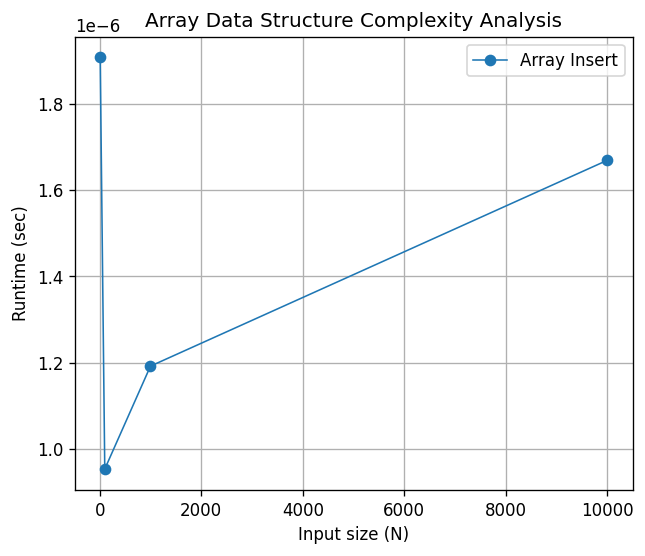

In [24]:
legend = ("Array Insert", "")
inputs = []
for x in [10, 100, 1000, 10000]:
    inputs.append([array('i', [i for i in range(x)])])
    
profiling_data = []
N = []
for input in inputs:
    curr_arr = input[0]
    N.append(len(curr_arr))
    profiling_data.append(profile(curr_arr.insert, 0, 99))
    
graph(N, profiling_data, legend)

### Array Append

In [7]:
def array_append_profiling(scale):
    profiling_data = []
    N = np.array([v for v in range(scale)])
    for (i, j) in enumerate(N):
        profiling_data.append(profile(curr_arr.append, 99))
    return (N, profiling_data)

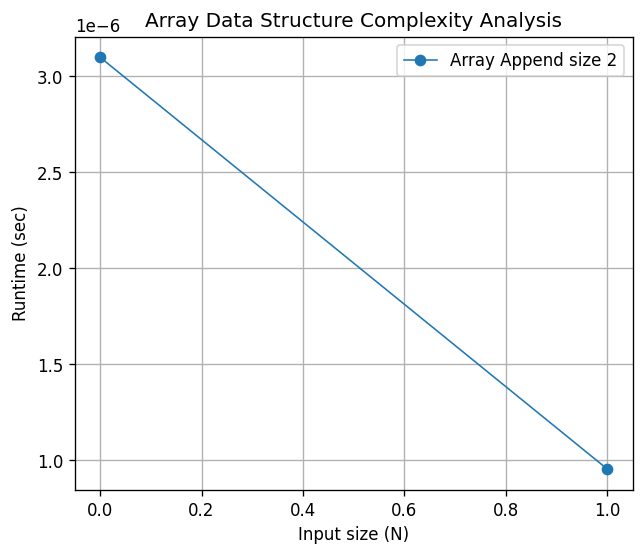

In [9]:
scale = 2
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

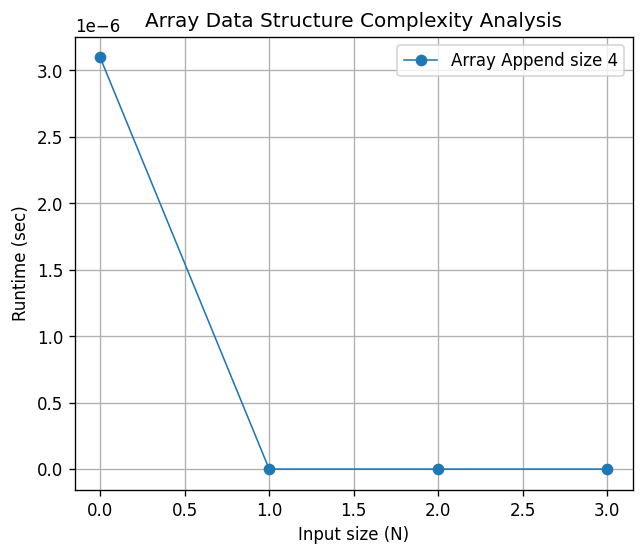

In [10]:
scale = 4
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

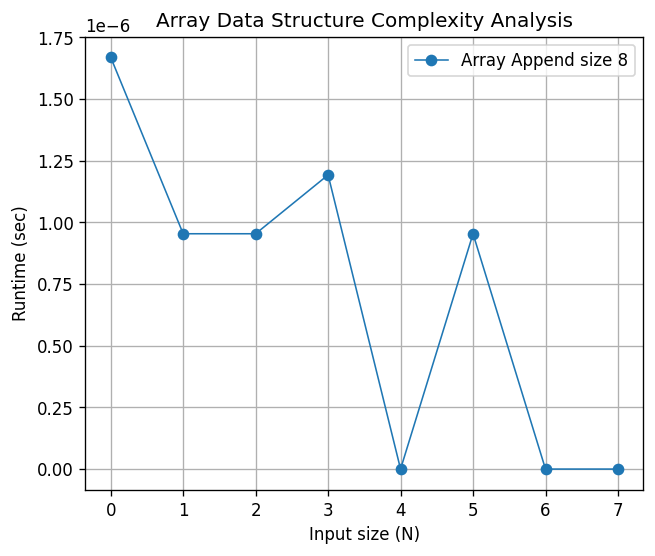

In [11]:
scale = 8
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

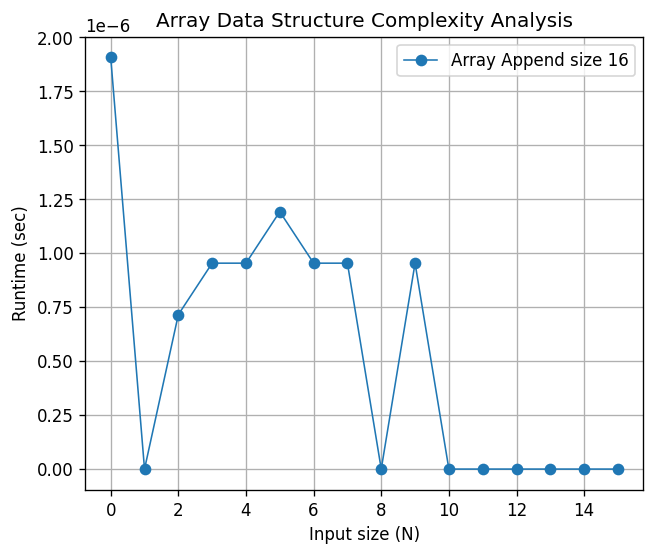

In [12]:
scale = 16
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

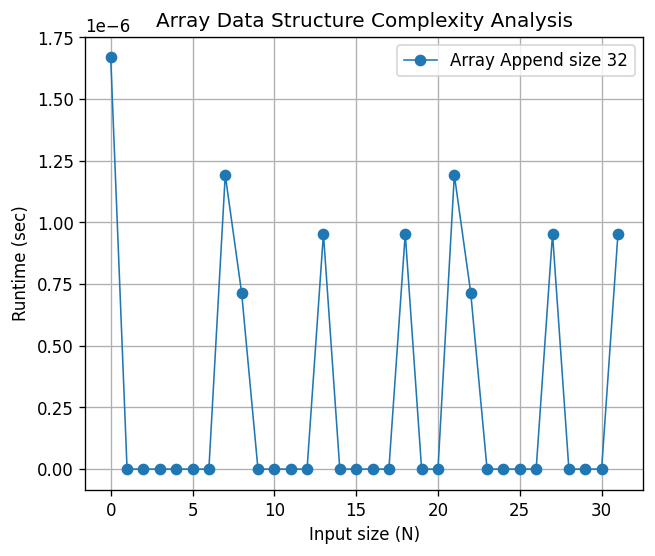

In [13]:
scale = 32
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

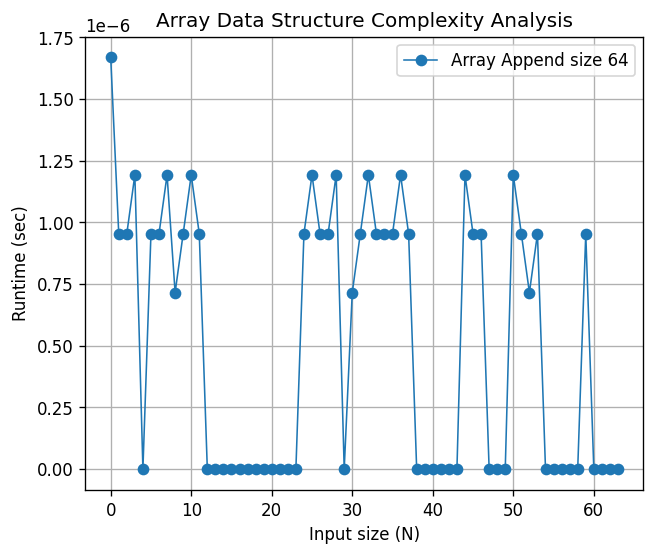

In [14]:
scale = 64
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

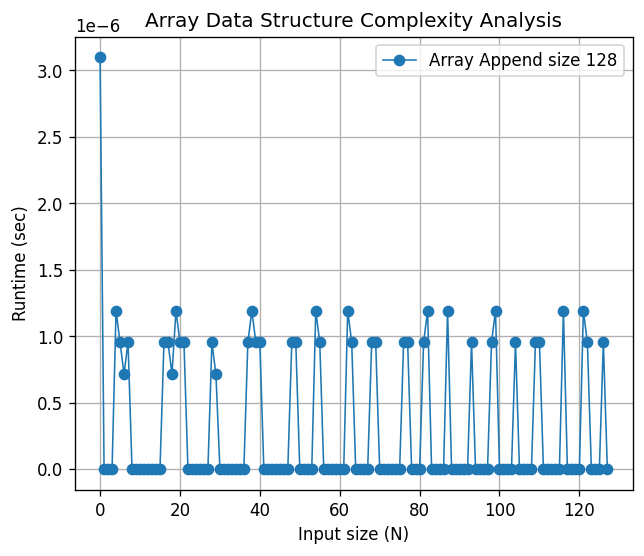

In [15]:
scale = 128
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

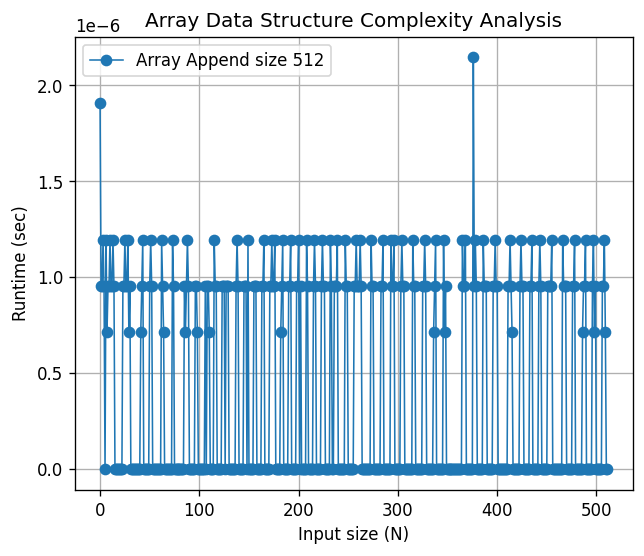

In [16]:
scale = 512
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

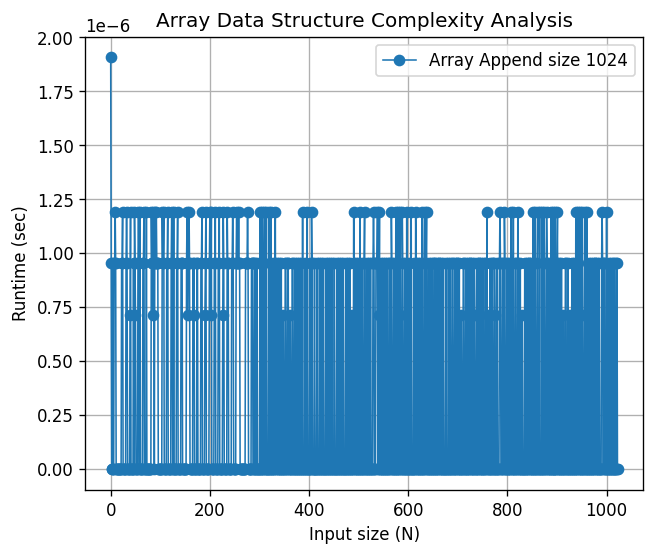

In [17]:
scale = 1024
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

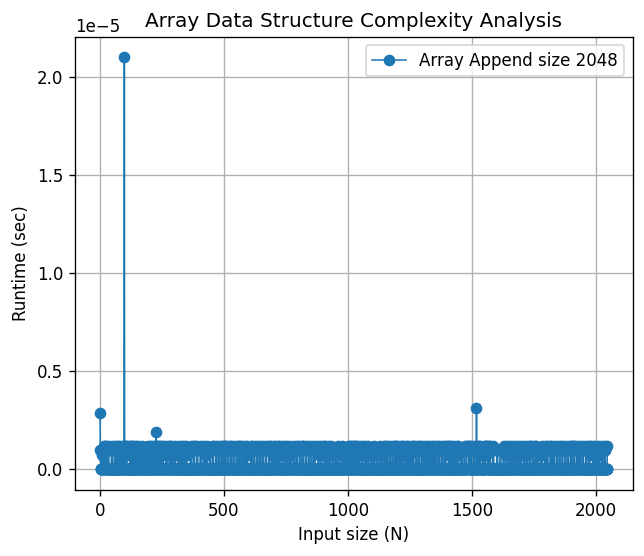

In [18]:
scale = 2048
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

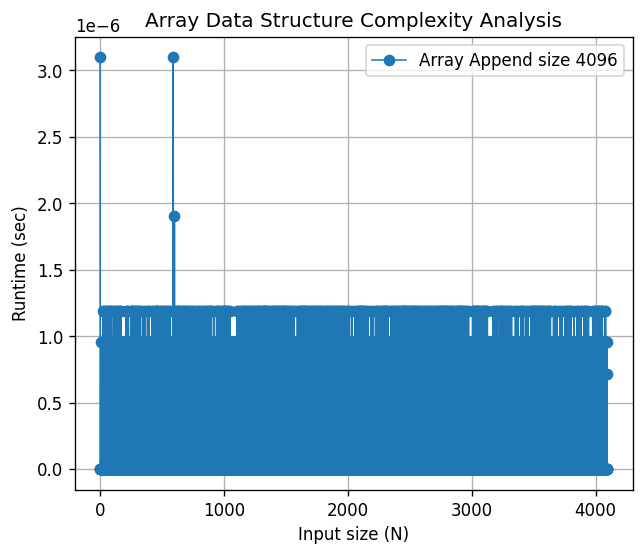

In [19]:
scale = 4096
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

In [ ]:
scale = 1073741824
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)